In [2]:
132

132

의사결정트리(Decision Tree)
- 지니계수 : 최대값 0.5. 얼마나 불순한지(순수도) 확인.
- 루트노드 :  (맨 위) / 규칙으로 쪼갤수 있는 규칙 노드 / 더 이상 규칙으로 쪼갤수 없는 리프 노드
- 과적합 문제가 자주 발생할 수 있다. 
 - 해결책으로 max_depth 등의 가지치기 등을 사용한다. or 앙상블 모델 사용한다.

In [4]:
from sklearn.tree import DecisionTreeClassifier  # 결정트리 분류 코드
from sklearn.datasets import  load_iris 
from sklearn.model_selection import train_test_split # 학습/테스트 데이터 분항



In [5]:
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.data,     # 입력 특성(X)
    iris_data.target,   # 정답 라벨(y)
    test_size = 0.2,    # 테스트 데이타 비율 20%
    random_state=42     # 결과 재현(시드 고정)
)

In [6]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

120 30 120 30


In [6]:
model = DecisionTreeClassifier()  # 결정 트리 분류 모델
model.fit(X_train,y_train)        # 학습 데이터로 모델 학습

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [ ]:
!pip install graphviz

In [7]:
# DecisionTree가 데이터를 어떻게 분기하는지 구조 시각화
from sklearn.tree import export_graphviz # 결정트리 구조를 파일로 출력

export_graphviz(
    model,                                                              # 학습된 모델
    out_file='./output/iris_tree.dot',                                       # 트리 구조 저장 경로/파일
    feature_names= iris_data.feature_names,         # 특성 이름
    class_names=iris_data.target_names,             # 클래스 이름
    filled = True                                                       # 노드색상으로 클래스 구분  
)

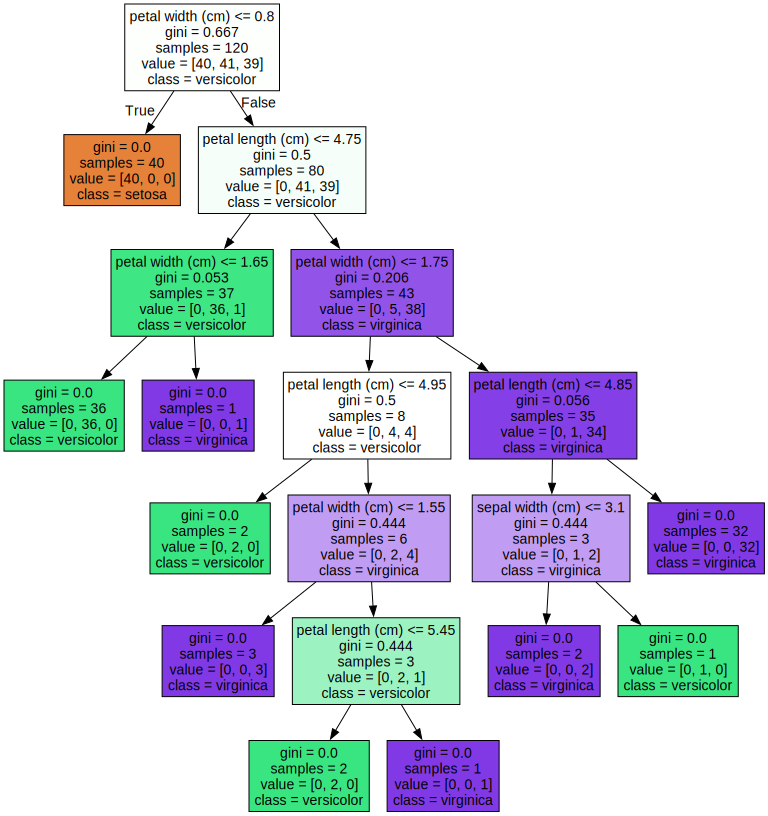

In [8]:
import graphviz # 그래프 시각화 라이브러리
with open('./output/iris_tree.dot') as f:   # 결정트리 dot 파일 열기
    dot_graph = f.read()                    # 파일 내용 읽기

graphviz.Source(dot_graph)                  # 트리 구조를 그래프로 출력

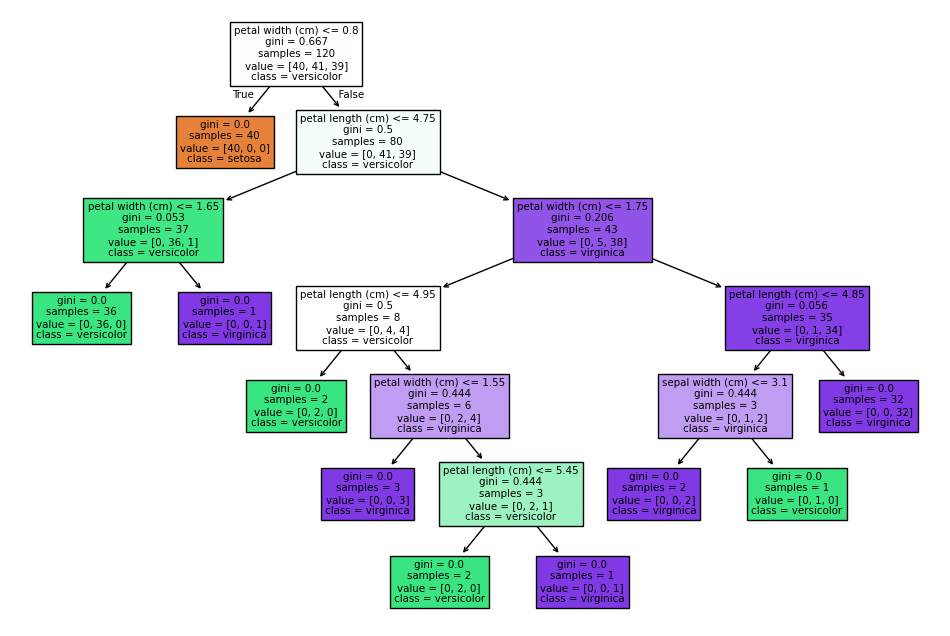

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

iris = load_iris()
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

앙상블 모델 : 머신러닝 집단 지성
보팅 : 여러개의 ML 모델을 사용하는데 서로 다른 모델을 사용해서 투표한다. 
- (LR, K-NN, SVM) 모델 혼합 사용

배깅 : 같은 모델을 여러번 사용한다. 
- (DT, DT, DT) 모델 사용해서 앙상블한다. => Random Forest 모델

부스팅(모델) 

방식
- 하드 보팅 : model1(0.3, 0.7), model2(0.4, 0.6), model3(0.7,0.3) => 분류 모델의 경우
결과가 첫번째 결과는 0.5 이하가 2개 이상이니(0), 두번째 결과는 0.5이상이 2개 이상인 (1)로 판단한다. 
    - 투표수로 투표한다.
- 소프트 보팅 : model1(0.3, 0.7), model2(0.4, 0.6), model3(0.7,0.3) => 분류모델일 경우
결과가 (0.466..., 0.533..) => (0, 1)로 판단한다. 

In [10]:
# 보팅 방식 (여러 모델의 예측을 종합)
from sklearn.ensemble import VotingClassifier # 투표 기반의 앙상블 분류기

from sklearn.linear_model import LogisticRegression # 로지스틱회귀 모델(분류모델)
from sklearn.neighbors import KNeighborsClassifier  # KNN 분류 모델

from sklearn.datasets import load_breast_cancer     # 유방암 데이터셋 로드
from sklearn.model_selection import train_test_split    # 학습/테스틑 데이터셋 분리

from  sklearn.metrics import accuracy_score # 분류 정확도 평가
import pandas as pd                         

In [13]:
cancer = load_breast_cancer()   # 유방암 데이터셋 로드
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [14]:
cancer_df = pd.DataFrame(
    cancer.data,                    # 입력 특성 데이터
    columns= cancer.feature_names   # 특성 이름
)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
# EDA는 생략, 데이터 분류부터 진행
X_train,X_test, y_train,y_test = train_test_split(
    cancer.data,        # 입력 특성 X
    cancer.target,      # 정답 라벨 y
    test_size=0.2,      # 테스트 데이터 비율 20%
    random_state=42     # 결과 재현용 시드
)


In [17]:
lr_model = LogisticRegression(solver='liblinear')   # 로지스틱 회귀(기본 방법)
knn_model = KNeighborsClassifier(n_neighbors=8)     # KNN 모델 (이웃수 8)

In [18]:
vo_model  = VotingClassifier(
    estimators=[('lr', lr_model),('knn', knn_model)],   # 사용할 계별 모델들
    voting = 'soft'                                     # 확률 기반 보팅 방식
)

vo_model.fit(X_train,y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('lr', ...), ('knn', ...)]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001


In [19]:
pred = vo_model.predict(X_test) # 테스트 데이터 예측
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [20]:
accuracy_score(y_test, pred)    # 예측 정확도 계산


0.9649122807017544

In [21]:
# 모델1 단독 사용
lr_model.fit(X_train, y_train)      # 로지스틱 회귀 모델 학습
lr_pred = lr_model.predict(X_test)  # 테스트 데이터로 예측
accuracy_score(y_test,lr_pred)      # 예측 정확도 계산

0.956140350877193

In [22]:
# 모델2 단독 사용
knn_model.fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)
accuracy_score(y_test,knn_pred)

0.956140350877193

In [23]:
# 배깅 방식(랜덤포레스트 사용)
from sklearn.ensemble import RandomForestClassifier     # 결정 트리 기반 앙상블 모델
from sklearn.metrics import accuracy_score              # 성능평가지표(정확도)
from sklearn.model_selection import train_test_split    # 학습/테스트 데이터 분할
import pandas as pd 
import numpy as np

In [24]:
cancer = load_breast_cancer()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,        # 입력 특성 X
    cancer.target,      # 정답 라벨 y
    test_size=0.2,      # 테스트 데이터 비율 20%
    random_state=42     # 결과 재현용 시드
)

In [26]:
# RandomForest 모델 불러온다 (시드 42, 트리 최대깊이 5)
rf_model  = RandomForestClassifier(random_state=42, max_depth=5)

# 랜덤 포레스트 모델 학습
rf_model.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [27]:
# 테스트 데이터로 예측
pred = rf_model.predict(X_test)  # 테스트 데이터로 예측

# 예측 정확도 계산
accuracy_score(y_test,pred)

0.9649122807017544

In [ ]:
# GridSearchCV로 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV    # 하이퍼 파라미터 최적화 도구
params = {
    'max_depth' : [2,3,4],              # 트리 최대 깊이 후보
    'min_samples_split' : [2,4,6,8,10], # 분기 최소 샘플 수 후보
    'min_samples_leaf' : [2,8,16]       # 리프 최소 샘플 수 후보
}

rf_model = RandomForestClassifier(
    n_estimators = 100,      # 트리 갯수
    random_state = 42   
)

grid_search = GridSearchCV(
    rf_model,   # 선택 모델
    params,     # 탐색할 파라미터
    cv=5        # 5겹 교차검증
)

grid_search.fit(X_train,y_train)    # 최적의 파라미터 탐색


In [30]:
grid_search.best_params_ # 최적의 하이퍼파라미터 조합 확인,  _는 학습 후 각종 지표를 볼수 있게 붙힘

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [32]:
grid_search.best_score_ # 교차 검증 기준 최고 성능 점수 확인

np.float64(0.9516483516483516)

In [ ]:
import time

rf_model = RandomForestClassifier(
    max_depth= 4,               # 트리 최대 깊이
    min_samples_leaf= 2,        # 리프 최소 샘플 수
    min_samples_split=2,        # 분기 최소 샘플 수
    n_estimators=100,           # 트리 갯수
    random_state=42,            # 결과 재현용 시드 42
)

start_time = time.time()
rf_model.fit(X_train, y_train)
# pred = rf_model,
end_time = time.time()
print('소요 시간 :', end_time-start_time, "초")
pred = rf_model.predict(X_test)
accuracy_score(y_test, pred)




소요 시간 : 0.0945730209350586 초


0.9649122807017544

부스팅 방식 : 첫 번째 모델이 잘못 계산한 것을 두번째 모델이 개선시켜 학습시키고, 두번째 모델이 잘못 계산한 것을 세번째 모델이 개선시켜 학습시킨다.
- 속도가 다른 앙상블 모델에 비해서는 상대적으로 느리다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier # 그래디언트 부스팅 분류 모델
# xgboost lightgbm catboost


# cancer 데이터셋, 8:2 재현시드 42
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data,
    cancer.target,
    test_size=0.2,
    random_state=42,
    stratify=cancer.target
)
gb_model = GradientBoostingClassifier(random_state=42)  # GB 모델 생성

start_time = time.time()
gb_model.fit(X_train, y_train)
end_time = time.time()

print('학습 소요 시간 :', end_time-start_time, "초")
pred = gb_model.predict(X_test)
accuracy_score(y_test,pred)


학습 소요 시간 : 0.23443007469177246 초


0.956140350877193

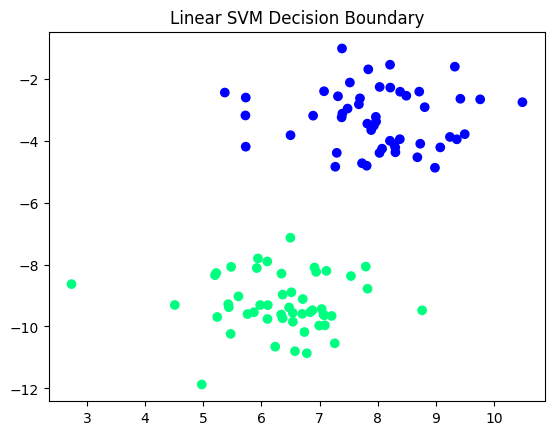

In [40]:
# 선형 SVM
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 데이터 생성 2차원 데이터 사용할 때
X, y = make_blobs(n_samples=100, centers=2, random_state=6) # 두 개의 군집(클래스) 데이터 생성

# 선형 SVM 모델 학습
model = SVC(kernel='linear')    # 선형 커널을 사용하는 SVM 분류기
model.fit(X, y)

# 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter') # 데이터 점을 색으로 구분하여 시각화
plt.title("Linear SVM Decision Boundary")
plt.show()

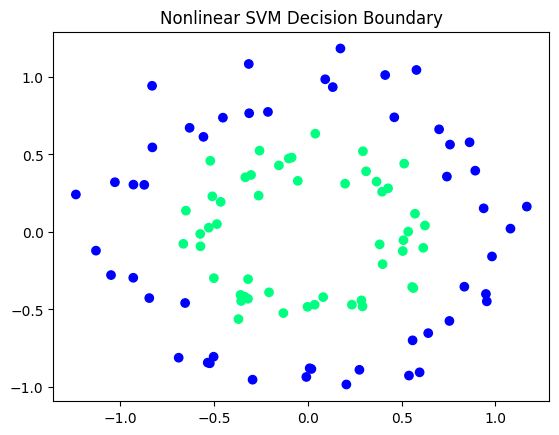

In [ ]:
# 비선형 svm 모델 
from sklearn.svm import SVC                 # SVM 분류모델 SVR
from sklearn.datasets import make_circles   # 
import matplotlib.pyplot as plt

# 데이터 생성
X, y = make_circles(
    n_samples=100,  # 데이터 100개
    factor=0.5,     # 바깥 원의 반지름 대비 안쪽 원의 반지름 비율
    noise=0.1)      # 데이터 섞이는 노이즈

# 비선형 SVM 모델 학습 (RBF 커널)
model = SVC(
    kernel='rbf',   # RBF(가우시안) 커널 -> 비선형 분류
    gamma=1         # 결정 경계의 굴곡
    )  
model.fit(X, y)

# 시각화
plt.scatter(
    X[:, 0],  # X축 첫번째 특성은 X축, 두번째 특성은 Y축 사용
    X[:, 1],  
    c=y, 
    cmap='winter'
    )   
plt.title("Nonlinear SVM Decision Boundary")
plt.show()

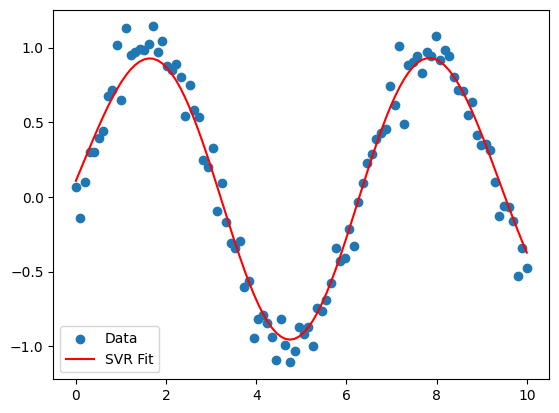

In [ ]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
X = np.linspace(0, 10, 100).reshape(-1, 1)  # 0~10까지 구간 100개를 1차원 형태로 변환
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])   # 사인함수 + 노이즈 (회귀 대상)


# print(X)
# print(y)

# SVM 회귀 모델 학습
model = SVR(
    kernel='rbf',   # 비선형 회귀를 위한 RBF 커널
    C=1,            # 오차에 대한 패널티 강도   (크면 경계가 구불구불 -> 과적합 가능성 / 작으면 경계가 부드러워짐)
                    # 0 < C < 무한대  (실수의 양수값으로 설정하면 된다, 하이퍼 파라미터 최적화로 찾는다. C=[0.01,0.1,1,10,100,1000])
    epsilon=0.1     # 오차 허용 구간    (크면 더 많은 데이터를 허용범위(튜브) 안에 넣어서 단순한 모델을 만듦)
    )
model.fit(X, y)

# 예측 및 시각화
y_pred = model.predict(X)
plt.scatter(X, y, label="Data")     # 실제데이터
plt.plot(X, y_pred, color='red', label="SVR Fit")   # SVR 모델의 회귀 구간
plt.legend()
plt.show()

SVR 쓰기 좋은 상황
- 데이터에 약간의 노이즈가 있는 경우
- 복잡한 곡선 형태의 관계
- 선형회귀 못쓸때